In [1]:
import numpy as np
import pandas as pd  
import markdown 
import scipy.stats
import warnings
from matplotlib import pyplot as plt
pd.options.display.float_format = '{:.4f}'.format

#импортируем библиотеки, которые помогут проанализировать данные

In [2]:
df_startup = pd.read_csv("Downloads/startupworld.csv")

#импортируем датасет

In [3]:
df_startup.head()
#выводим данные

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
0,Bytedance,140.0000,4/7/2017,China,Beijing,Artificial intelligence,NaN,2017,7,4
1,SpaceX,100.3000,12/1/2012,United States,Hawthorne,Other,NaN,2012,1,12
2,Stripe,95.0000,1/23/2014,United States,San Francisco,Fintech,NaN,2014,23,1
3,Klarna,45.6000,12/12/2011,Sweden,Stockholm,Fintech,NaN,2011,12,12
4,Canva,40.0000,1/8/2018,Australia,Surry Hills,Internet software & services,NaN,2018,8,1


Выбранный для анализа датасет содержит в себе данные о стартапах-единорогах (оценка свыше 1 млрд.долларов).
Цель анализа состоит в том, чтобы выявить, в каких странах, индустриях и годах самые дорогие стартапы и есть ли зависимость между этими показателями

# Начнем обработку датасета

In [4]:
df_startup = df_startup.drop(columns=['Date', 'month', "day", 'Investors']) 
#удаляем столбцы, которые нам больше не понадобятся

In [5]:
df_startup.head()

,Company,Valuation,Country,City,Industry,year
0,Bytedance,140.0000,China,Beijing,Artificial intelligence,2017
1,SpaceX,100.3000,United States,Hawthorne,Other,2012
2,Stripe,95.0000,United States,San Francisco,Fintech,2014
3,Klarna,45.6000,Sweden,Stockholm,Fintech,2011
4,Canva,40.0000,Australia,Surry Hills,Internet software & services,2018


In [6]:
df_startup_cols =  ['Компания', 'Оценка в млрд.долларов', 'Страна', 'Город','Индустрия', 'Год']
#меняем название колонок

In [7]:
df_startup.columns = df_startup_cols

In [8]:
df_startup.loc[df_startup["Индустрия"] == "Artificial Intelligence", "Индустрия"] = "Artificial intelligence"
df_startup.loc[df_startup["Индустрия"] == "Finttech", "Индустрия"] = "Fintech"
#приводим написание некоторый элементов к единообразию

In [9]:
df_startup[df_startup['Город'].isna()]
#выводим все строки, где есть пропущенные значения

,Компания,Оценка в млрд.долларов,Страна,Город,Индустрия,Год
11,FTX,25.0000,Hong Kong,NaN,Fintech,2021
192,HyalRoute,3.5000,Singapore,NaN,Mobile & telecommunications,2020
399,Advance Intelligence Group,2.0000,Singapore,NaN,Artificial intelligence,2021
572,Trax,1.3000,Singapore,NaN,Artificial intelligence,2019
677,Amber Group,1.1000,Hong Kong,NaN,Fintech,2021
682,Carousell,1.1000,Singapore,NaN,E-commerce & direct-to-consumer,2021
735,WeLab,1.0000,Hong Kong,NaN,Fintech,2017
812,PatSnap,1.0000,Singapore,NaN,Internet software & services,2021
840,Moglix,1.0000,Singapore,NaN,E-commerce & direct-to-consumer,2021
843,Matrixport,1.0000,Singapore,NaN,Fintech,2021


In [10]:
df_startup['Город'] = df_startup['Город'].fillna(df_startup['Страна'])
#заменяем пропущенные значения в строке колонке "Город" на значение из колонки "Страна", 
#так как в случае с Гонконгом и Сингапуром название города совпадает с названием страны

# Переходим к созданию новых переменных

<AxesSubplot:ylabel='Frequency'>

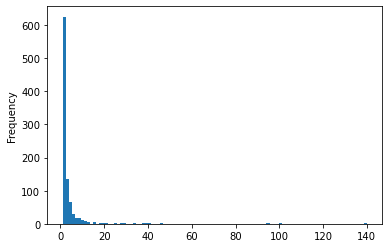

In [11]:
df_startup['Оценка в млрд.долларов'].plot(kind='hist', bins=100)

In [12]:
df_startup[df_startup['Оценка в млрд.долларов'] > 25]

,Компания,Оценка в млрд.долларов,Страна,Город,Индустрия,Год
0,Bytedance,140.0000,China,Beijing,Artificial intelligence,2017
1,SpaceX,100.3000,United States,Hawthorne,Other,2012
2,Stripe,95.0000,United States,San Francisco,Fintech,2014
3,Klarna,45.6000,Sweden,Stockholm,Fintech,2011
4,Canva,40.0000,Australia,Surry Hills,Internet software & services,2018
5,Instacart,39.0000,United States,San Francisco,"Supply chain, logistics, & delivery",2014
6,Databricks,38.0000,United States,San Francisco,Data management & analytics,2019
7,Revolut,33.0000,United Kingdom,London,Fintech,2018
8,Nubank,30.0000,Brazil,Sao Paulo,Fintech,2018
9,Epic Games,28.7000,United States,Cary,Other,2018


In [13]:
def get_val_cat(val):
    if val < 2:
        return 'Низкая оценка'
    elif 2 <= val < 5:
        return 'Средняя оценка'
    elif 5 <= val <= 10:
        return 'Высокая оценка'
    elif val > 10:
        return 'Очень высокая оценка'
    else:
        return val
#вводим новую переменную и определяем ее значения

In [14]:
df_startup['Оценка_кат'] = df_startup['Оценка в млрд.долларов'].apply(get_val_cat)

In [15]:
df_startup['Оценка_кат'] = pd.Categorical(df_startup['Оценка_кат'])
#делаем переменную категориальной

In [16]:
df_startup['Оценка_кат'].value_counts()

Низкая оценка           520
Средняя оценка          290
Высокая оценка           91
Очень высокая оценка     35
Name: Оценка_кат, dtype: int64

In [17]:
df_startup.head()

,Компания,Оценка в млрд.долларов,Страна,Город,Индустрия,Год,Оценка_кат
0,Bytedance,140.0000,China,Beijing,Artificial intelligence,2017,Очень высокая оценка
1,SpaceX,100.3000,United States,Hawthorne,Other,2012,Очень высокая оценка
2,Stripe,95.0000,United States,San Francisco,Fintech,2014,Очень высокая оценка
3,Klarna,45.6000,Sweden,Stockholm,Fintech,2011,Очень высокая оценка
4,Canva,40.0000,Australia,Surry Hills,Internet software & services,2018,Очень высокая оценка


<AxesSubplot:ylabel='Frequency'>

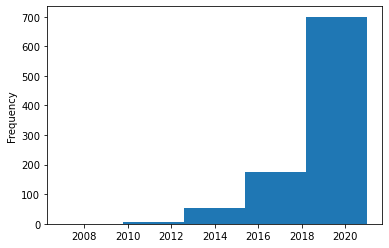

In [18]:
df_startup['Год'].plot(kind='hist', bins=5)

In [19]:
def get_year_cat(year):
    if year < 2015:
        return 'Старый'
    elif 2015 <= year < 2020:
        return 'Зрелый'
    elif year >= 2020:
        return 'Молодой'
    else:
        return year
#вводим новую переменную и определяем ее значения

In [20]:
df_startup['Год_кат'] = df_startup['Год'].apply(lambda x: get_year_cat(x))

In [21]:
df_startup['Год_кат'] = pd.Categorical(df_startup['Год_кат'])
#делаем переменную категориальной

In [22]:
df_startup['Год_кат'].value_counts()

Молодой    590
Зрелый     322
Старый      24
Name: Год_кат, dtype: int64

In [23]:
df_startup

,Компания,Оценка в млрд.долларов,Страна,Город,Индустрия,Год,Оценка_кат,Год_кат
0,Bytedance,140.0000,China,Beijing,Artificial intelligence,2017,Очень высокая оценка,Зрелый
1,SpaceX,100.3000,United States,Hawthorne,Other,2012,Очень высокая оценка,Старый
2,Stripe,95.0000,United States,San Francisco,Fintech,2014,Очень высокая оценка,Старый
3,Klarna,45.6000,Sweden,Stockholm,Fintech,2011,Очень высокая оценка,Старый
4,Canva,40.0000,Australia,Surry Hills,Internet software & services,2018,Очень высокая оценка,Зрелый
...,...,...,...,...,...,...,...,...
931,YipitData,1.0000,United States,New York,Internet software & services,2021,Низкая оценка,Молодой
932,Anyscale,1.0000,United States,Berkeley,Artificial intelligence,2021,Низкая оценка,Молодой
933,Iodine Software,1.0000,United States,Austin,Data management & analytics,2021,Низкая оценка,Молодой
934,ReliaQuest,1.0000,United States,Tampa,Cybersecurity,2021,Низкая оценка,Молодой


In [24]:
def get_country_cat(country):
    if country in ['Argentina','Brazil','Chile', "Colombia", "Mexico"]:
        return 'Латинская Америка'
    elif country in ['Australia']:
        return 'Австралия'
    elif country in ['Bermuda', "Canada","United States"]:
        return 'Северная Америка'
    elif country in ['Austria', "Belgium", 'Croatia', 'Czech Republic', 'Denmark', 
    'Estonia', 'Finland', 'France', 'Germany', 'Ireland', 'Lithuania', "Luxembourg",
    'Netherlands', 'Norway', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom']: 
        return 'Европа'
    elif country in ['China', 'Hong Kong', 'India', 'Japan','Malaysia', 'Indonesia', 
    'Philippines', 'Singapore', 'South Korea', 'Thailand', 'Vietnam']:
        return 'Азия'
    elif country in ['Israel', "Turkey","United Arab Emirates"]:
        return 'Средний Восток'
    elif country in ['Nigeria', "Senegal","South Africa"]:
        return 'Северная Америка'
    else:
        return country
#вводим новую переменную и определяем ее значения

In [25]:
df_startup['Регион'] = df_startup['Страна'].apply(get_country_cat)

In [26]:
df_startup['Регион'] = pd.Categorical(df_startup['Регион'])
#делаем переменную категориальной

# Переходим к изучению центральных тенденций и мерам разброса

In [27]:
print(df_startup['Оценка в млрд.долларов'].mean())
print(df_startup['Оценка в млрд.долларов'].median())
print(df_startup['Оценка в млрд.долларов'].mode())
#определяем меры центральной тенденции

3.281153846153838
1.6
0   1.0000
Name: Оценка в млрд.долларов, dtype: float64


In [28]:
df_startup.describe()

#определяем меры разброса

,Оценка в млрд.долларов,Год
count,936.0000,936.0000
mean,3.2812,2019.5438
std,7.4732,2.0203
min,1.0000,2007.0000
25%,1.0500,2018.0000
50%,1.6000,2021.0000
75%,3.0000,2021.0000
max,140.0000,2021.0000


In [29]:
df_startup.groupby('Страна')['Оценка в млрд.долларов'].agg(func=['mean', 'median'])
#определяем среднее и медиану по различным переменным

,mean,median
Страна,,
Argentina,2.4500,2.4500
Australia,8.4333,1.5500
Austria,2.9050,2.9050
Belgium,3.7750,3.7750
Bermuda,1.6000,1.6000
Brazil,4.0700,2.0000
Canada,2.5153,2.0000
Chile,1.5000,1.5000
China,3.3697,1.4500


In [30]:
df_startup.groupby('Год')['Оценка в млрд.долларов'].agg(func=['mean', 'median'])
#определяем среднее и медиану по различным переменным

,mean,median
Год,,
2007,1.3800,1.3800
2010,3.0000,3.0000
2011,25.6500,25.6500
2012,30.5750,10.0000
2013,1.4333,1.5000
2014,12.7215,3.8000
2015,2.6905,1.6000
2016,3.6836,1.7950
2017,6.4378,1.5600


In [31]:
df_startup.groupby('Индустрия')['Оценка в млрд.долларов'].agg(func=['mean', 'median'])
#определяем среднее и медиану по различным переменным

,mean,median
Индустрия,,
Artificial intelligence,4.2855,1.5000
Auto & transportation,3.0793,2.4100
Consumer & retail,2.7883,1.5900
Cybersecurity,2.6229,1.8000
Data management & analytics,3.3806,1.6100
E-commerce & direct-to-consumer,2.8539,1.5600
Edtech,3.1619,1.5000
Fintech,3.8960,1.8500
Hardware,3.0809,1.5750


# Переходим к расчету z-оценки

In [32]:
X = df_startup['Оценка в млрд.долларов'][0] 
Y = df_startup['Оценка в млрд.долларов'].mean()
sigma = df_startup['Оценка в млрд.долларов'].std(ddof=0)
print(X, Y, sigma)
z_score = (X - Y) / sigma
print(z_score)

140.0 3.281153846153838 7.4691856409333255
18.30438453753068


In [33]:
df_startup['z-score'] = scipy.stats.zscore(df_startup['Оценка в млрд.долларов'])

<AxesSubplot:ylabel='Frequency'>

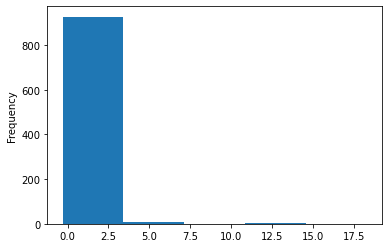

In [34]:
df_startup['z-score'].plot(kind='hist', bins=5)

In [35]:
full=df_startup[df_startup['z-score'] < 5]
#избавляемся от выбросов

In [36]:
df_startup.head()

,Компания,Оценка в млрд.долларов,Страна,Город,Индустрия,Год,Оценка_кат,Год_кат,Регион,z-score
0,Bytedance,140.0000,China,Beijing,Artificial intelligence,2017,Очень высокая оценка,Зрелый,Азия,18.3044
1,SpaceX,100.3000,United States,Hawthorne,Other,2012,Очень высокая оценка,Старый,Северная Америка,12.9892
2,Stripe,95.0000,United States,San Francisco,Fintech,2014,Очень высокая оценка,Старый,Северная Америка,12.2796
3,Klarna,45.6000,Sweden,Stockholm,Fintech,2011,Очень высокая оценка,Старый,Европа,5.6658
4,Canva,40.0000,Australia,Surry Hills,Internet software & services,2018,Очень высокая оценка,Зрелый,Австралия,4.9160


# Переходим к расчету корреляций и визуализации данных

In [37]:
df_startup['Год'].corr(df_startup['Оценка в млрд.долларов'])
#определяем зависимость оценки стартапа от года его основания

-0.23050881990632868

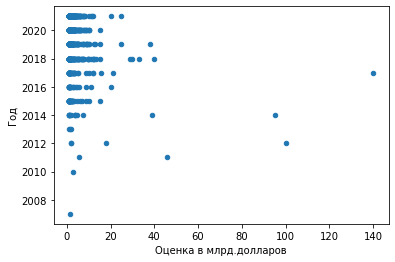

In [38]:
df_startup.plot('Оценка в млрд.долларов','Год', kind='scatter')
plt.ticklabel_format(style='plain')
plt.ticklabel_format(useOffset=False)
#визуализируем 

Данный график показывает, что большая часть стартапов была основана с 2014 по 2020 года

In [39]:
reg_statup = full.groupby(full['Регион'])['Оценка в млрд.долларов'].mean()
reg_statup
#определяем зависимость региона основания стартапа от его оценки

Регион
Австралия           8.4333
Азия                2.5966
Европа              2.9246
Латинская Америка   3.6083
Северная Америка    2.9323
Средний Восток      2.1854
Name: Оценка в млрд.долларов, dtype: float64

<BarContainer object of 6 artists>

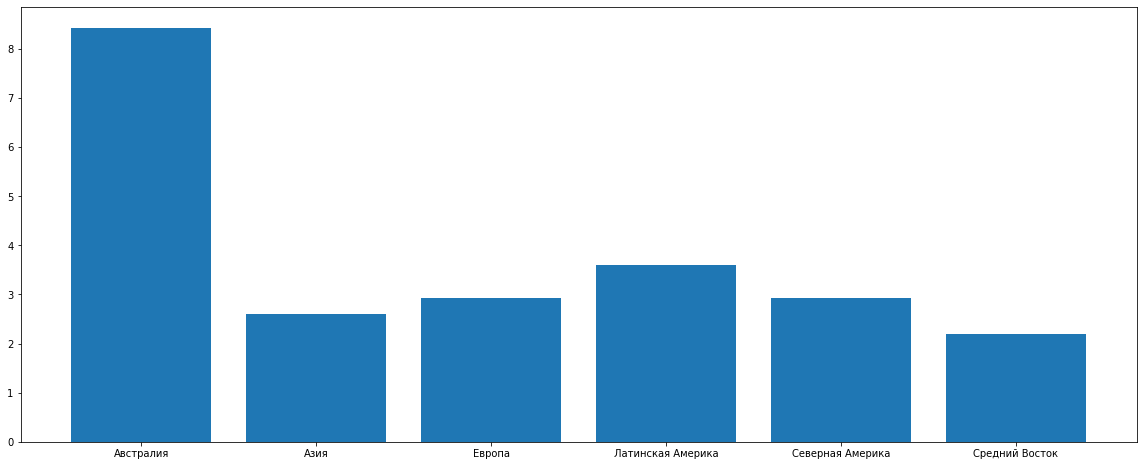

In [40]:
fig, ax = plt.subplots(figsize=(20,8))

ax.bar(reg_statup.index, reg_statup)
#визуализируем

Данный график показывает, что большая часть стартапов с наиболее высокой оценкой базируется в Австралии

In [41]:
ind_statup = full.groupby(full['Индустрия'])['Оценка в млрд.долларов'].mean()
ind_statup
#определяем зависимость оценки стартапа от индустрии

Индустрия
Artificial intelligence               2.4006
Auto & transportation                 3.0793
Consumer & retail                     2.7883
Cybersecurity                         2.6229
Data management & analytics           3.3806
E-commerce & direct-to-consumer       2.8539
Edtech                                3.1619
Fintech                               3.1933
Hardware                              3.0809
Health                                2.6390
Internet software & services          2.8968
Mobile & telecommunications           2.1376
Other                                 2.9032
Supply chain, logistics, & delivery   2.8684
Travel                                2.7385
Name: Оценка в млрд.долларов, dtype: float64

In [42]:
#plt.rcParams.update({'font.size': 30})

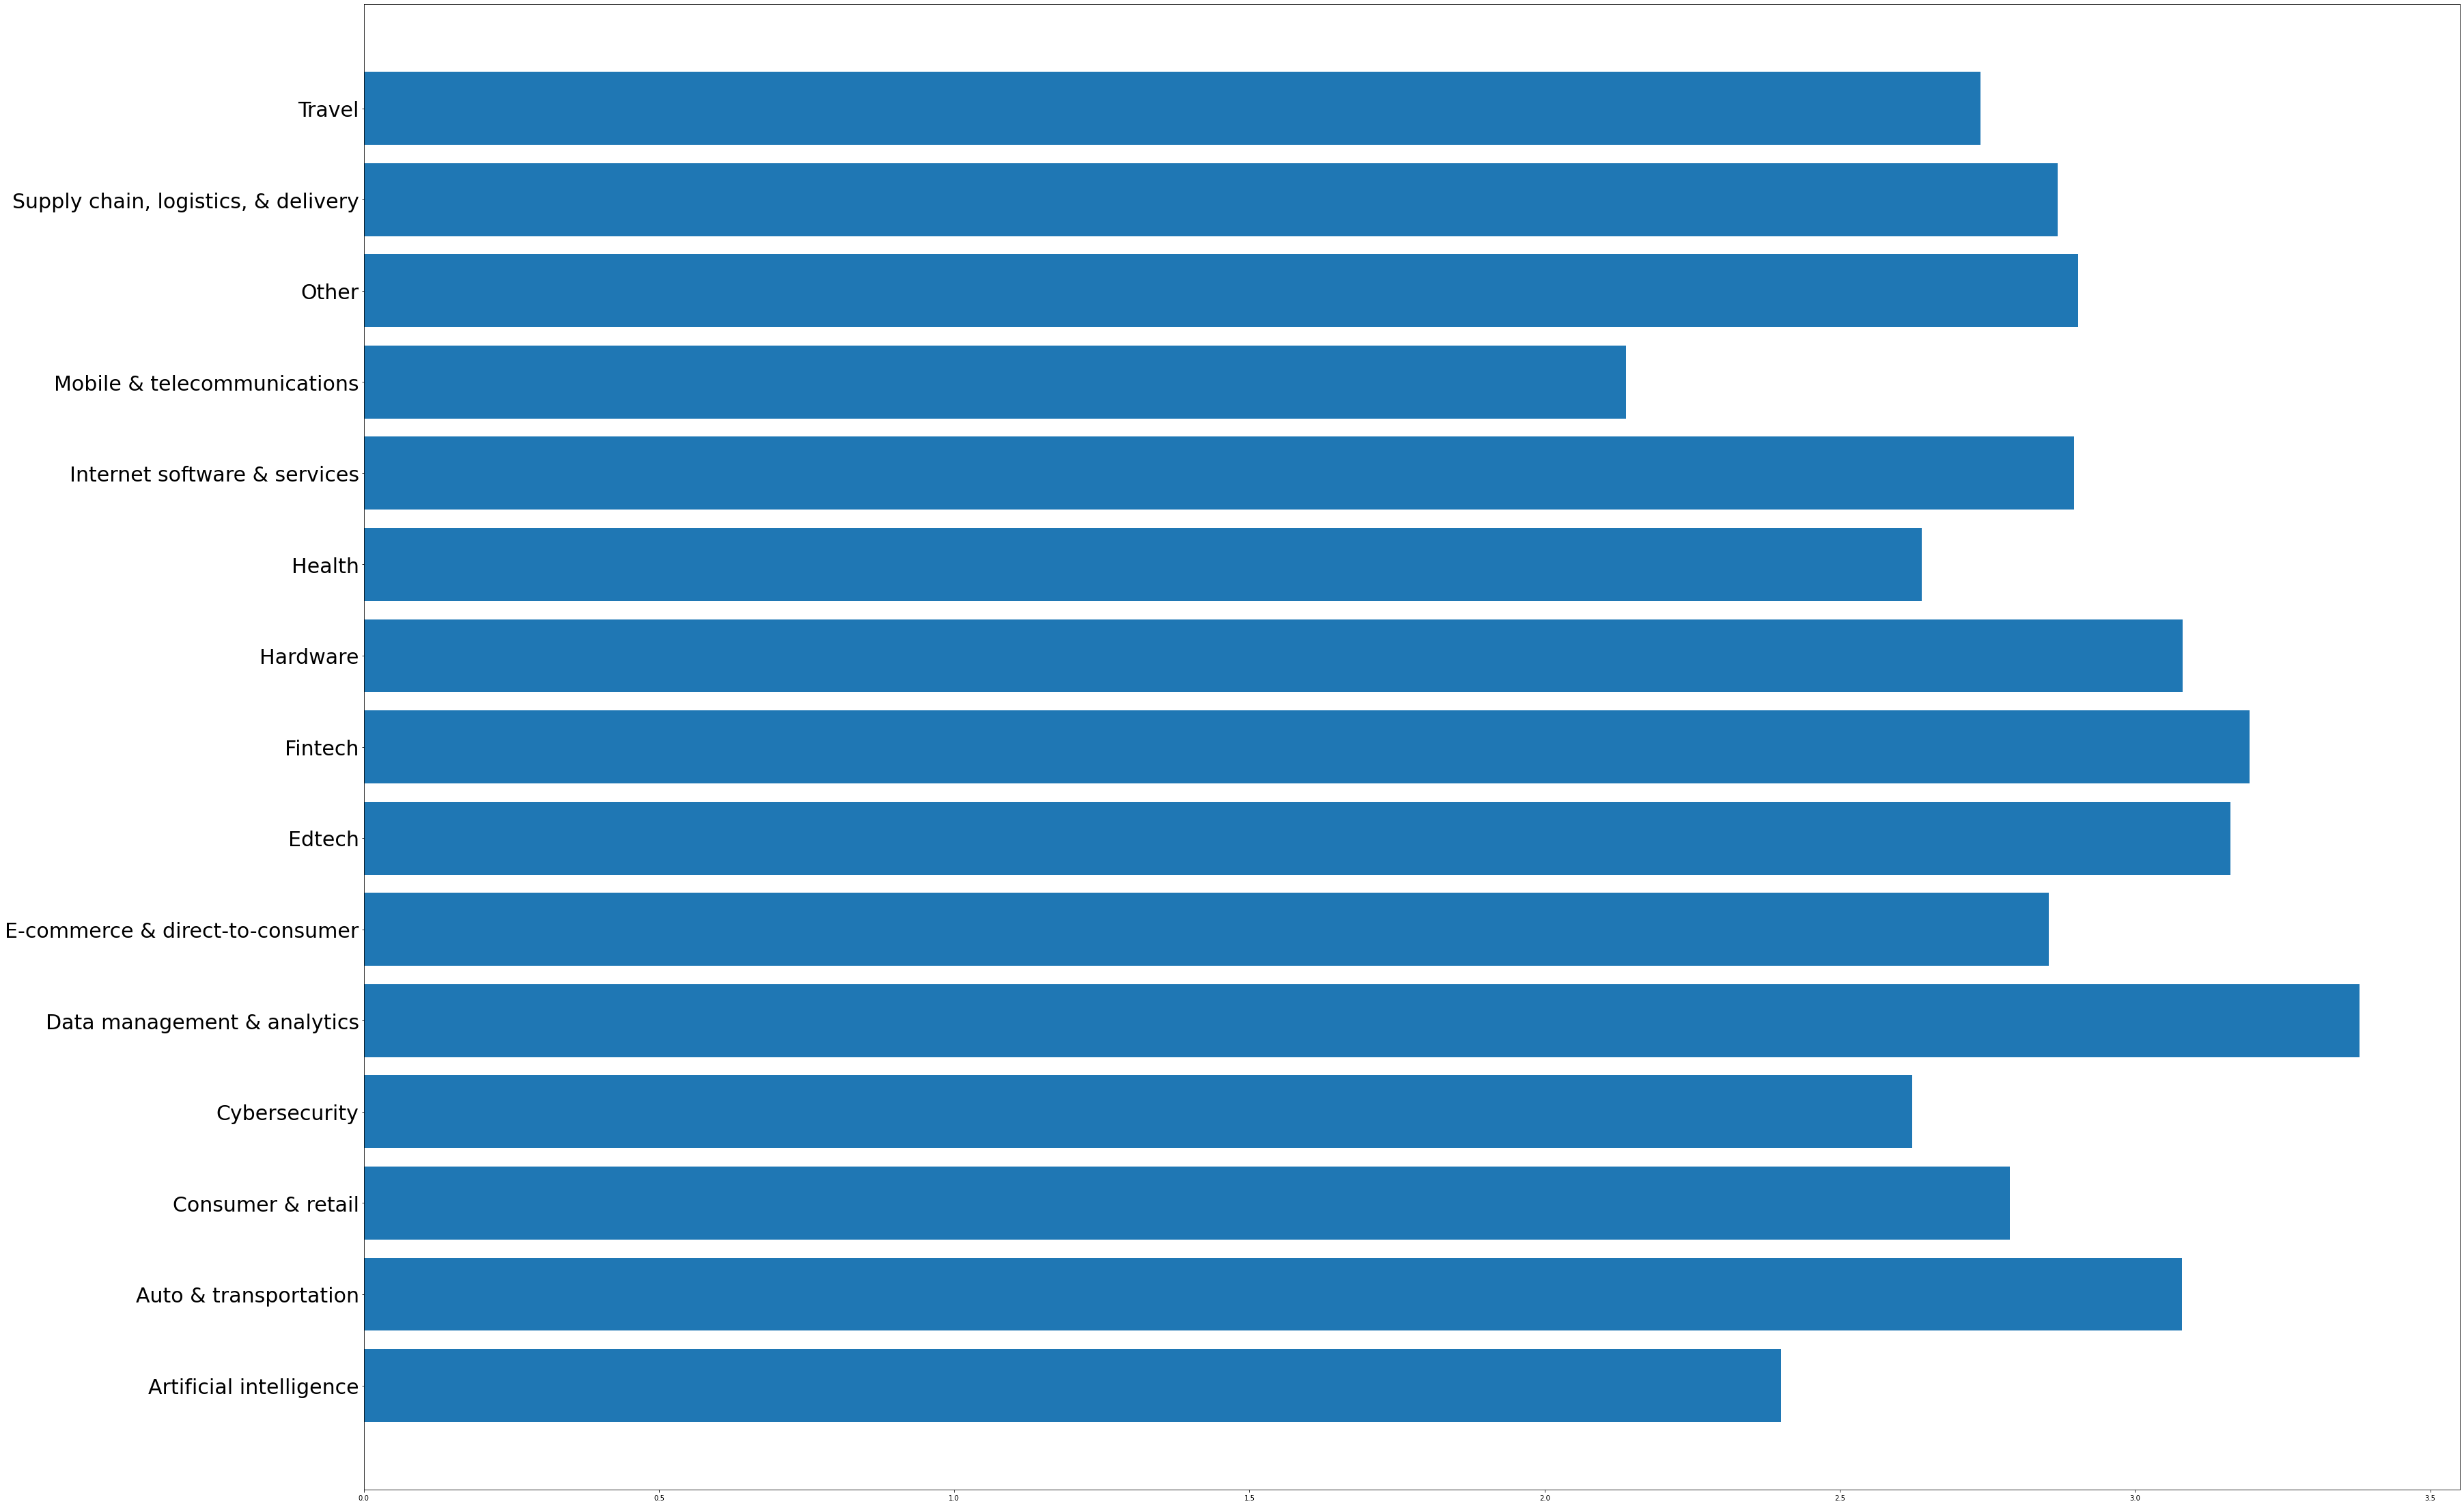

In [43]:
fig, ax = plt.subplots(figsize=(55,40))

ax.barh(ind_statup.index, ind_statup)
ax.tick_params(axis='y', which='major', labelsize=30)
#визуализируем

Данный график показывает, что стартапы с самый высокой оценкой принадлежать к индустрии Data managment & analytics

In [44]:
full.groupby(['Год_кат', 'Год'])['Оценка в млрд.долларов'].mean().loc['Молодой']
#определаем зависимость оценки стартапа от его зрелости

Год
2007      NaN
2010      NaN
2011      NaN
2012      NaN
2013      NaN
2014      NaN
2015      NaN
2016      NaN
2017      NaN
2018      NaN
2019      NaN
2020   3.2953
2021   2.0265
Name: Оценка в млрд.долларов, dtype: float64

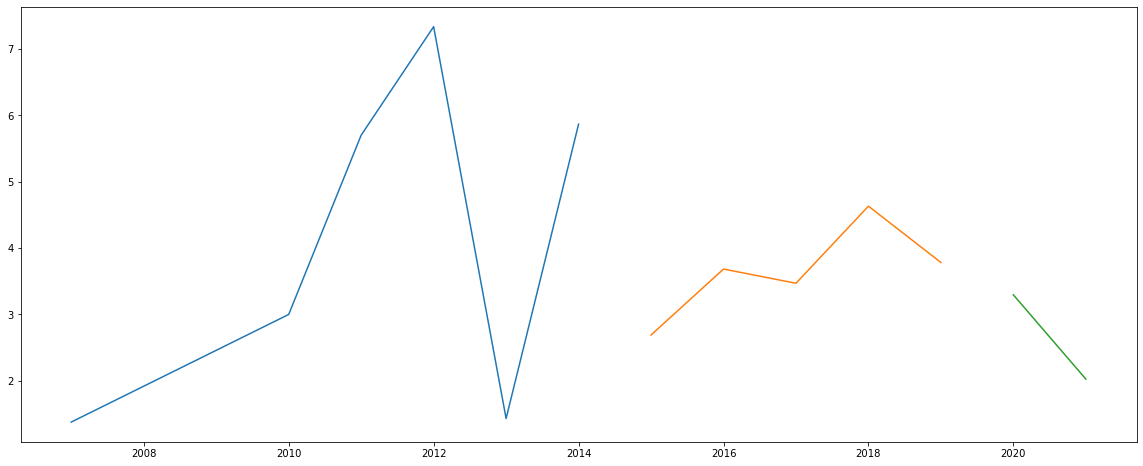

In [45]:
fig, ax = plt.subplots(figsize=(20,8))

ax.plot(full.groupby(['Год_кат', 'Год'])['Оценка в млрд.долларов'].mean().loc['Старый'])
ax.plot(full.groupby(['Год_кат', 'Год'])['Оценка в млрд.долларов'].mean().loc['Зрелый'])
ax.plot(full.groupby(['Год_кат', 'Год'])['Оценка в млрд.долларов'].mean().loc['Молодой'])
#визуализируем


# Переходим к тестированию гипотез

Хи-квадрта: тестируем гипотезу, что есть регионы, где чаще встречаются стартапы с высокой и очень высокой оценкой 

In [46]:
def get_target_cat(target):
    if target < 5:
        return 0
    else:
        return 1
#вводим новую переменную и определяем ее значения

In [47]:
df_startup['target'] = df_startup['Оценка в млрд.долларов'].apply(get_target_cat)

In [48]:
df_startup.head()

,Компания,Оценка в млрд.долларов,Страна,Город,Индустрия,Год,Оценка_кат,Год_кат,Регион,z-score,target
0,Bytedance,140.0000,China,Beijing,Artificial intelligence,2017,Очень высокая оценка,Зрелый,Азия,18.3044,1
1,SpaceX,100.3000,United States,Hawthorne,Other,2012,Очень высокая оценка,Старый,Северная Америка,12.9892,1
2,Stripe,95.0000,United States,San Francisco,Fintech,2014,Очень высокая оценка,Старый,Северная Америка,12.2796,1
3,Klarna,45.6000,Sweden,Stockholm,Fintech,2011,Очень высокая оценка,Старый,Европа,5.6658,1
4,Canva,40.0000,Australia,Surry Hills,Internet software & services,2018,Очень высокая оценка,Зрелый,Австралия,4.9160,1


In [49]:
ct_o = df_startup.groupby('Регион')['target'].value_counts().unstack()
ct_o

target,0,1
Регион,,
Австралия,4,2
Азия,234,31
Европа,97,18
Латинская Америка,19,5
Северная Америка,433,66
Средний Восток,23,3


In [50]:
alpha = 0.05
critical_value = 11.1

In [51]:
chi_square = scipy.stats.chi2_contingency(ct_o)[0]

In [52]:
chi_square > critical_value

False

Гипотеза не подтвердилась

T-test: тестируем гипотезу, что в молодых стартапах больше инвестиций

In [53]:
ct_o = df_startup.groupby('Год_кат')['target'].value_counts().unstack()
ct_o

target,0,1
Год_кат,,
Зрелый,251,71
Молодой,542,48
Старый,17,7


In [54]:
old = df_startup[df_startup['Год_кат'] == 'Молодой']['Оценка в млрд.долларов']
young = df_startup[df_startup['Год_кат'] != 'Молодой']['Оценка в млрд.долларов']

<AxesSubplot:>

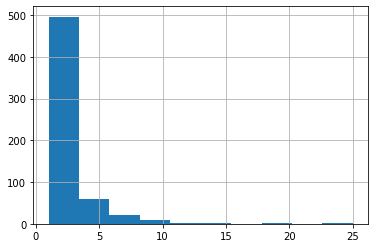

In [55]:
old.hist()

<AxesSubplot:>

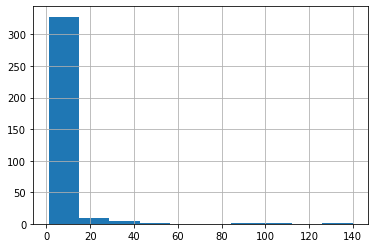

In [56]:
young.hist()

Так как распределение выборки не нормальное, то проверить данную гипотезу через t-test нельзя => проверим ее через хи-квадрат

In [57]:
alpha = 0.01
critical_value = 9.21034

In [58]:
chi_square = scipy.stats.chi2_contingency(ct_o)[0]

In [59]:
chi_square > critical_value

True

Гипотеза подтвердилась

# Построение регрессий: линейная

Так как в данном датасете недостаточно данных для построения линейной и логической регрессии, воспользуемся другим датасетом

In [83]:
import seaborn as sns
import statsmodels.api as sm

In [84]:
df_avocado = pd.read_csv("Downloads/avocado.csv").drop("Unnamed: 0", axis = 1)

#импортируем датасет, к сожалению, подходящих данных по теме датасета выше не было:(((

In [85]:
df_avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.3300,64236.6200,1036.7400,54454.8500,48.1600,8696.8700,8603.6200,93.2500,0.0000,conventional,2015,Albany
1,2015-12-20,1.3500,54876.9800,674.2800,44638.8100,58.3300,9505.5600,9408.0700,97.4900,0.0000,conventional,2015,Albany
2,2015-12-13,0.9300,118220.2200,794.7000,109149.6700,130.5000,8145.3500,8042.2100,103.1400,0.0000,conventional,2015,Albany
3,2015-12-06,1.0800,78992.1500,1132.0000,71976.4100,72.5800,5811.1600,5677.4000,133.7600,0.0000,conventional,2015,Albany
4,2015-11-29,1.2800,51039.6000,941.4800,43838.3900,75.7800,6183.9500,5986.2600,197.6900,0.0000,conventional,2015,Albany


In [86]:
df_avocado = df_avocado.drop(columns=['4046', '4225', "4770", 'XLarge Bags', 'region']) 
#удаляем столбцы, которые нам больше не понадобятся

In [88]:
df_avocado.head()

,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,type,year
0,2015-12-27,1.3300,64236.6200,8696.8700,8603.6200,93.2500,conventional,2015
1,2015-12-20,1.3500,54876.9800,9505.5600,9408.0700,97.4900,conventional,2015
2,2015-12-13,0.9300,118220.2200,8145.3500,8042.2100,103.1400,conventional,2015
3,2015-12-06,1.0800,78992.1500,5811.1600,5677.4000,133.7600,conventional,2015
4,2015-11-29,1.2800,51039.6000,6183.9500,5986.2600,197.6900,conventional,2015


In [89]:
df_avocado_num = df_avocado[['AveragePrice', 'Total Volume', 
                             'Total Bags', 'Small Bags', 'Large Bags']]
#создаем новый датасет с теми переменными, которые нам нужны для построения регресии

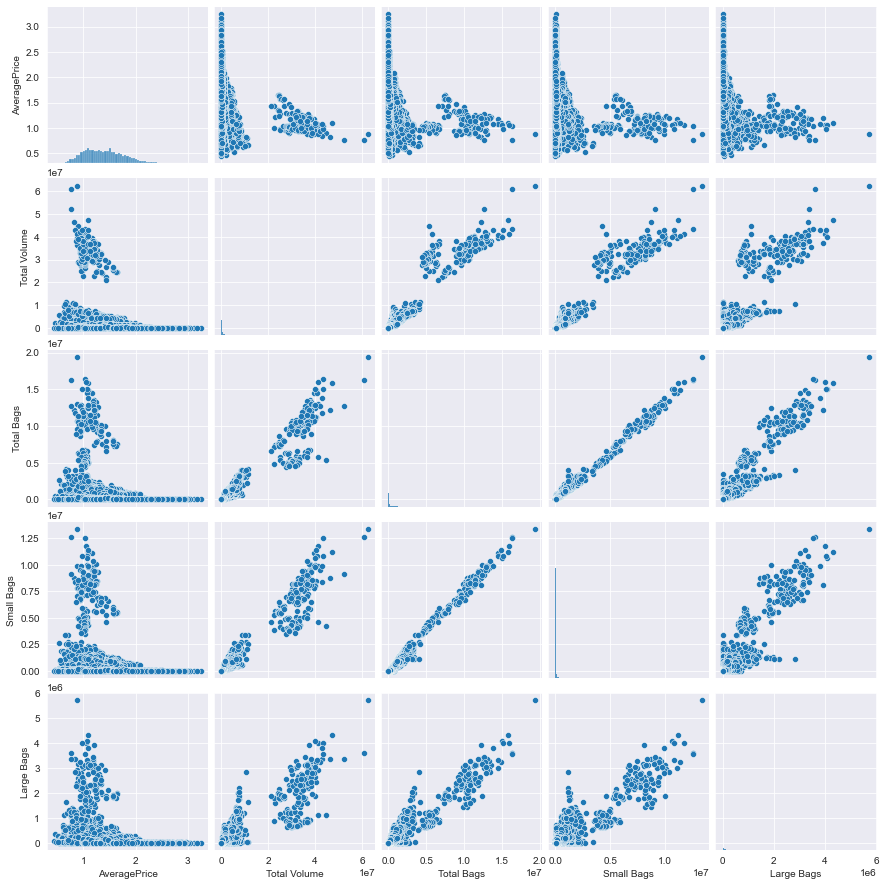

In [90]:
sns.pairplot(df_avocado_num)
#рассматриваем, есть ли между выбранными переменными корреляция

In [91]:
X = df_avocado_num['AveragePrice']
y = df_avocado_num['Total Volume']

res = scipy.stats.linregress(X, y)
print(res)
#строим модель зависимости средней цены на авокадо по количеству проданных авокадо 

LinregressResult(slope=-1653136.0028502806, intercept=3174917.5414396212, rvalue=-0.19275238715271908, pvalue=2.941683652080309e-152, stderr=62300.511865834465, intercept_stderr=91114.68096349276)


In [96]:
r_sq = res.rvalue ** 2
print(r_sq)

0.037153482753071704


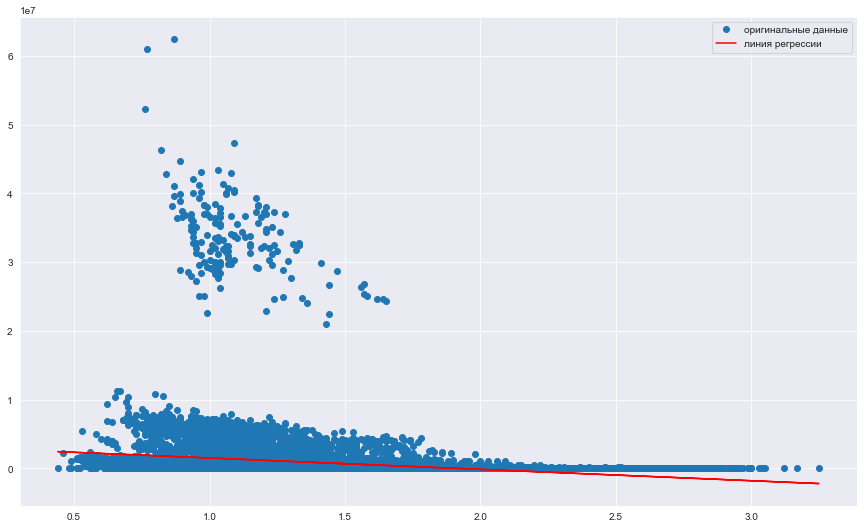

In [99]:
plt.plot(X, y, 'o', label='оригинальные данные')
plt.plot(X, res.intercept + res.slope*X, 'r', label='линия регрессии')
plt.legend()
plt.show()
#строим регрессию

Данный график отражает предсказание цен на авокадо в зависимости от проданного объема

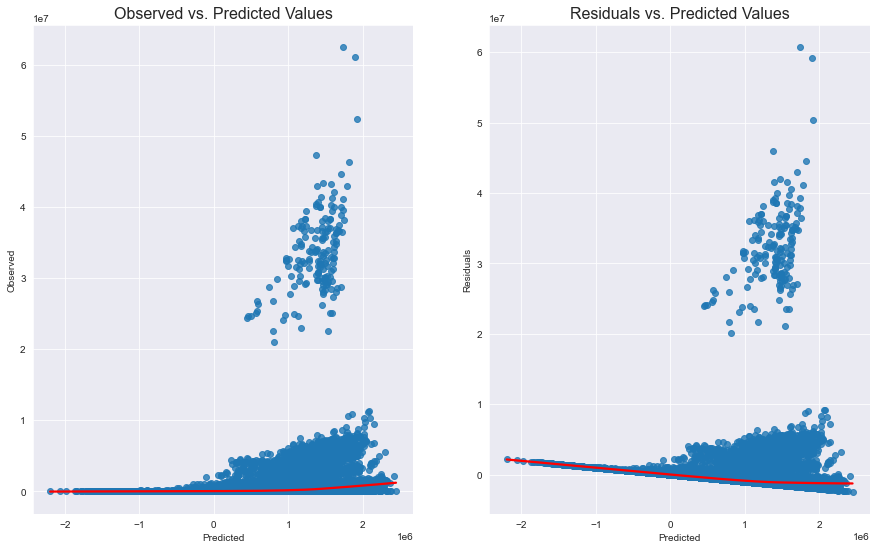

In [107]:
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):

    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(res_simple, y)    
#тестируем модель

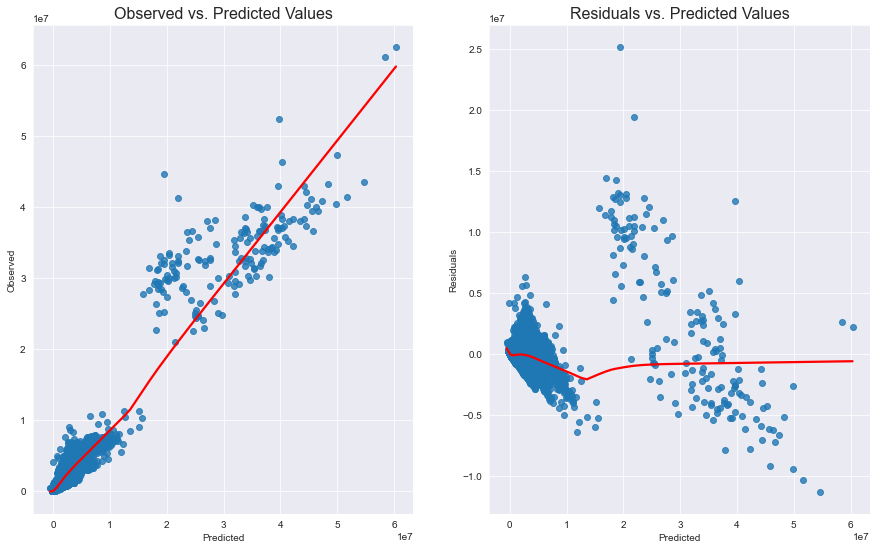

In [106]:
linearity_test(res_mult, y)    

# Построение регрессий: логистическая

In [123]:
def get_target(target):
    if target == "conventional":
        return 0
    elif target == "organic":
        return 1
#вводим новую переменную и определяем ее значение
#рассмотрим, как влияет тип авокадо (органический или обычный) на среднюю цену и продажи

In [124]:
df_avocado.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [125]:
df_avocado["target"] = df_avocado["type"].apply(get_target)

In [126]:
df_avocado["target"].value_counts()

0    9126
1    9123
Name: target, dtype: int64

In [134]:
df = df_avocado[['AveragePrice', 'Total Volume', 'target', 'Total Bags',
                 'Small Bags', 'Large Bags']]
#создаем новый датасет с данными для анализа

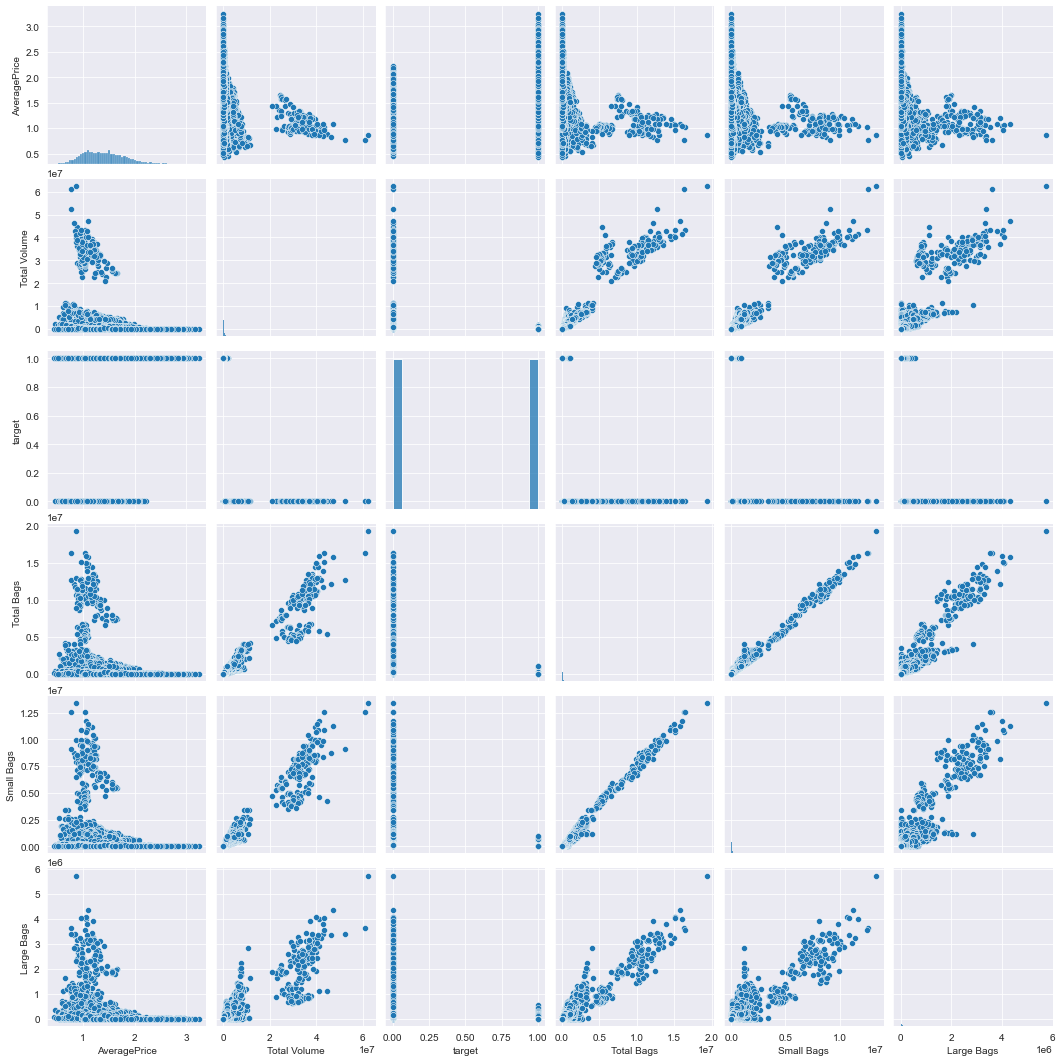

In [135]:
sns.pairplot(df)

In [136]:
X = df.drop('target', axis=1)
y = df['target']
X_constant = sm.add_constant(X)
logit = sm.Logit(y, X_constant).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.167741
         Iterations 17
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                18249
Model:                          Logit   Df Residuals:                    18243
Method:                           MLE   Df Model:                            5
Date:                Tue, 13 Dec 2022   Pseudo R-squ.:                  0.7580
Time:                        21:42:47   Log-Likelihood:                -3061.1
converged:                       True   LL-Null:                       -12649.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -4.0937      0.174    -23.505      0.000      -4.435      -3.752
AveragePrice     4.586

/Users/daryabashkova/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/daryabashkova/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Видим, что тип авокадо оказывает влияние на его среднюю стоимость больше, чем на другие показатели